Training data complies with:
	- The extracted data has the shape: (112800, 28, 28, 1)
	- The data labels have the shape ("one-hot encoding" format): (112800, 47)
	- There are a total of 47 different labels. They are as follows: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']


Testing data complies with:
	- The extracted data has the shape: (18800, 28, 28, 1)
	- The data labels have the shape ("one-hot encoding" format): (18800, 47)
	- There are a total of 47 different labels. They are as follows: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']





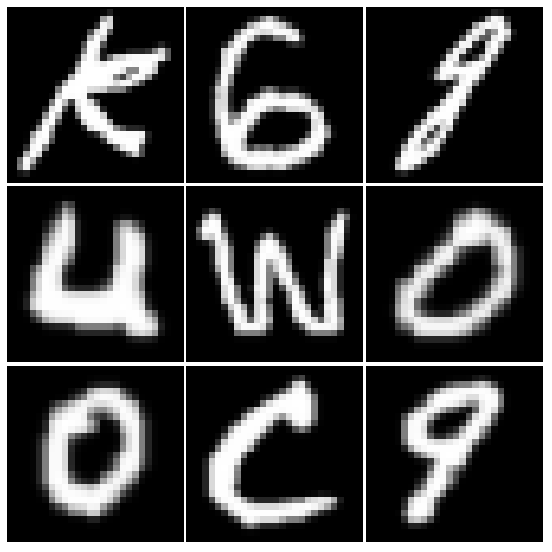

The message (from top to bottom) is:
O-C-9
U-W-O
K-6-g



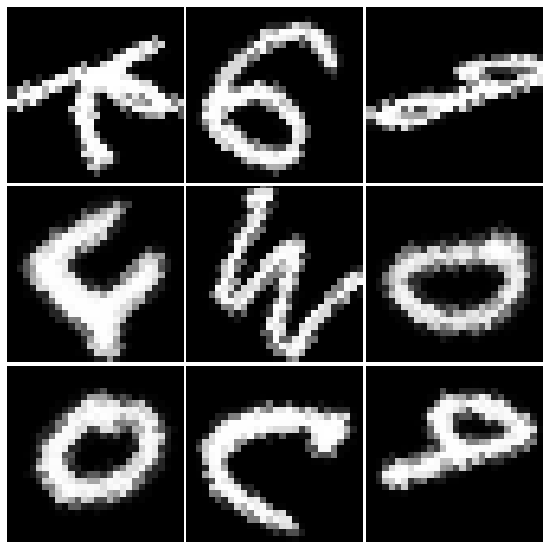

In [2]:
####################################################################################################################################################
## LIBRARIES:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
####################################################################################################################################################
## VISUALIZATION FUNCTIONS:

# Visualization Function 1: Displays the introduced images and returns the specified message
def dataset_visualization(X_array, Y_array, label_map, save_flag):
    
    # Create the figure with its axes and retrieve the image dimensions:
    fig, axs = plt.subplots(3, 3, figsize=(8.3, 8.3))

    # NOTE: A4 size is [210mm X 297mm] or [8.3in X 11.7in] (Width X Height). We aim to generate a square image
    # and, therefore, adjust it to the width.

    # Initialize the indices managing the rows/columns of the figure and the string with the classes:
    axes_ii = 0
    axes_jj = 0
    msg = ""

    # Initialize the vector that will store the position of each axis (from top to bottom):
    axes_pos = np.array([[[0.05, 0.05, 0.3, 0.3], [0.35, 0.05, 0.3, 0.3], [0.65, 0.05, 0.3, 0.3]],
                         [[0.05, 0.35, 0.3, 0.3], [0.35, 0.35, 0.3, 0.3], [0.65, 0.35, 0.3, 0.3]],
                         [[0.05, 0.65, 0.3, 0.3], [0.35, 0.65, 0.3, 0.3], [0.65, 0.65, 0.3, 0.3]]])

    # Iterate through each index of training images and add them to the image:
    for X, Y in zip(X_array, Y_array):
    
        # Determine the label of the selected image and display the image:
        msg = msg + label_map[np.argmax(Y)]
    
        # Display all 3 levels of the image:
        X_3D = np.repeat(X, 3, axis=2)
        axs[axes_ii, axes_jj].imshow((X_3D*255).astype(np.uint8))
    
        # Configure the selected axis:
        axs[axes_ii, axes_jj].set_xlim(0, 28)
        axs[axes_ii, axes_jj].set_ylim(28, 0)
        axs[axes_ii, axes_jj].set_xticks([])
        axs[axes_ii, axes_jj].set_yticks([])
        axs[axes_ii, axes_jj].set_position(axes_pos[axes_ii, axes_jj])
        for lb in ["top", "right", "bottom", "left"]:
            axs[axes_ii, axes_jj].spines[lb].set_visible(False)
        
        # Adjust the values of the row/column indices of the figure:
        axes_jj += 1
        msg = msg + "-"  # Message with classes
        if axes_jj > 2:
            axes_ii += 1
            axes_jj = 0
            msg = msg[:-1] + "\n"  # Message with classes
        
    # Save the image if authorized and return it with the message:
    if save_flag:
        plt.savefig("EMNIST_Sample.pdf", format="pdf", bbox_inches="tight")
    return plt.gcf(), msg

# Visualization Function 2: Identical to the previous one but with data augmentation
def dataset_visualization_aug(X_array, Y_array, label_map, save_flag):
    
    # Create the figure with its axes and retrieve the image dimensions:
    fig, axs = plt.subplots(3, 3, figsize=(8.3, 8.3))

    # NOTE: A4 size is [210mm X 297mm] or [8.3in X 11.7in] (Width X Height). We aim to generate a square image
    # and, therefore, adjust it to the width.

    # Initialize the indices managing the rows/columns of the figure and the string with the classes:
    axes_ii = 0
    axes_jj = 0
    msg = ""

    # Initialize the vector that will store the position of each axis (from top to bottom):
    axes_pos = np.array([[[0.05, 0.05, 0.3, 0.3], [0.35, 0.05, 0.3, 0.3], [0.65, 0.05, 0.3, 0.3]],
                         [[0.05, 0.35, 0.3, 0.3], [0.35, 0.35, 0.3, 0.3], [0.65, 0.35, 0.3, 0.3]],
                         [[0.05, 0.65, 0.3, 0.3], [0.35, 0.65, 0.3, 0.3], [0.65, 0.65, 0.3, 0.3]]])

    # Iterate through each index of training images and add them to the image:
    for X, Y in zip(X_array, Y_array):
    
        # Determine the label of the selected image and display the image:
        msg = msg + label_map[np.argmax(Y)]
    
        # Display all 3 levels of the augmented image:
        aug_img = augmentation_process(X)
        X_3D = np.repeat(aug_img.numpy(), 3, axis=2)
        axs[axes_ii, axes_jj].imshow((X_3D*255).astype(np.uint8))
    
        # Configure the selected axis:
        axs[axes_ii, axes_jj].set_xlim(0, 28)
        axs[axes_ii, axes_jj].set_ylim(28, 0)
        axs[axes_ii, axes_jj].set_xticks([])
        axs[axes_ii, axes_jj].set_yticks([])
        axs[axes_ii, axes_jj].set_position(axes_pos[axes_ii, axes_jj])
        for lb in ["top", "right", "bottom", "left"]:
            axs[axes_ii, axes_jj].spines[lb].set_visible(False)
        
        # Adjust the values of the row/column indices of the figure:
        axes_jj += 1
        msg = msg + "-"  # Message with classes
        if axes_jj > 2:
            axes_ii += 1
            axes_jj = 0
            msg = msg[:-1] + "\n"  # Message with classes
        
    # Save the image if authorized and return it with the message:
    if save_flag:
        plt.savefig("EMNIST_Augmnet_Sample.pdf", format="pdf", bbox_inches="tight")
    return plt.gcf(), msg

####################################################################################################################################################
## FUNCTIONS:

# Function 1: Load data from the "file_csv" file and convert it to the required format
def preporcess_data(file_csv):
    
    # NOTE: The input file "file" corresponds to a CSV file with thousands of rows and (1 + 28x28) columns.
    # Each column is separated by commas and has no header. Each row is a 28x28 pixel image with values
    # between [0-255], plus a "label" value (the first column). Associated with the CSV file is a TXT file
    # that transforms the "label" into the Dataset characters. This text file consists of two columns ("label"
    # [0-46] and ASCII code) separated by a space. First, the TXT must be extracted, as its size allows for
    # "one-hot encoding" of the "labels".

    # Generate the name of the text file based on the "file":
    file_txt = file_csv.split("-")  # Keywords are separated by the "-" character
    file_txt = file_txt[0] + "-" + file_txt[1] + "-mapping.txt"  # Compose the name of the TXT file

    # Obtain the mapping between "labels" and characters, according to specifications:
    raw_map = pd.read_csv(file_txt, sep=" ", header=None)

    # NOTE: When using "read_csv" with "header=None," a generic header is generated that associates numbers from
    # 0 to the total number of columns to each column. This header will be numbers, not "Strings." Also, be careful
    # when deleting a column because the header is not updated; for example, if you delete column 0, the first
    # column will be 1, not 0.

    # Generate the dictionary that relates "label" to characters:
    label_map = raw_map.drop(0, axis="columns")  # Remove the first column that matches the index
    label_map[1] = label_map[1].apply(chr)  # Convert from ASCII code to character
    label_map = dict(enumerate(label_map[1].tolist()))  # Convert to a dictionary with the index (rows) as a guide

    # Read data from CSV, specifying the separator and that it has no header:
    raw_data = pd.read_csv(file_csv, sep=",", header=None)

    # Create the input set "x" (images):
    x = raw_data.drop(0, axis="columns")  # Remove the first "label" column
    x = x.astype("float32")  # Specify the data type
    x = x / 255  # Normalize pixel values between [0-1]
    x = x.values.reshape(-1, 28, 28, 1)  # Convert to a vector of 28x28x1 images
    x = np.transpose(x, [0, 2, 1, 3])  # Transpose height and width of the 28x28 images

    # Create the output set "y" ("label") in "one-hot encoding" mode:
    y = keras.utils.to_categorical(raw_data[0], len(label_map))

    # Inform the user about the treated Dataset:
    print("\t- The extracted data has the shape: " + str(x.shape))
    print("\t- The data labels have the shape (\"one-hot encoding\" format): " + str(y.shape))
    print("\t- There are a total of " + str(len(label_map)) + " different labels. They are as follows: " + str(
        list(label_map.values())) + "\n")

    # Return the created sets:
    return x, y, label_map

# Function 2: Shows the different augmentations applied to the "dataset"
def augmentation_process(raw_x):
    
    # Rotate the sample within the range [1/8 -> pi/4] (slightly less rotation is applied):
    rod_x = keras.layers.RandomRotation(factor=(-1/8, 1/8), fill_mode="nearest", interpolation="nearest", seed=177)(raw_x)
    
    # Apply a "zoom" of [0%-10%]:
    zoom_x = keras.layers.RandomZoom(height_factor=(0, 0.2), width_factor=None, fill_mode="nearest", interpolation="nearest", seed=177)(rod_x)
    
    # Apply a translation of [0%-10%] to the resulting sample:
    trans_x = keras.layers.RandomTranslation(height_factor=(0, 0.2), width_factor=(0, 0.2), fill_mode="nearest", interpolation="nearest", seed=177)(zoom_x)
    
    # Return the augmented sample:
    return trans_x
####################################################################################################################################################
## MAIN: Check the "dataset", adapt it, apply augmentation, and visualize it

# Get working directory and the "dataset" directory:
work_path = os.getcwd()
dataset_path = os.path.join(work_path, "EMNIST_Dataset")

# Generate the paths for training and testing CSV files:
train_csv = os.path.join(dataset_path, "emnist-balanced-train.csv")
test_csv = os.path.join(dataset_path, "emnist-balanced-test.csv")

# Load training and testing data:
print("Training data complies with:")
train_x, train_y, labels = preporcess_data(train_csv)
print("\nTesting data complies with:")
test_x, test_y, _ = preporcess_data(test_csv)
print("\n")

# Generate random indices for selecting 9 images:
rgen = np.random.default_rng(seed=117)
idx_selected = rgen.integers(1, high=train_x.shape[0], size=9, dtype=np.int32)

# Display images and message without augmentation:
fig1, msg = dataset_visualization(train_x[idx_selected], train_y[idx_selected], labels, False)
plt.show()
print("The message (from top to bottom) is:\n" + msg)

# Display images with augmentation:
fig2, _ = dataset_visualization_aug(train_x[idx_selected], train_y[idx_selected], labels, False)
plt.show()